<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/face_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary

In this notebook, we are going to see some packages to be used for face processing

# MTCNN: Face and facial landmarks detection

Implementation of the MTCNN (Multi-task Cascaded Convolutional Neural Networks for Face Detection) face detector for Keras in Python3.4+. It is written from scratch, using as a reference the implementation of MTCNN from David Sandberg (FaceNet’s MTCNN) in Facenet. It is based on the paper *Joint face detection and alignment using multitask cascaded convolutional networks*.

<img align="left" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/icon_book.png" width=50 px>

*Zhang, K et al. (2016): Zhang, K., Zhang, Z., Li, Z., and Qiao, Y. (2016). **Joint face detection and alignment using multitask cascaded convolutional networks.** IEEE Signal Processing Letters, 23(10):1499–1503.*


This implementation requires OpenCV>=4.1 and Keras>=2.0.0


The detector returns a list of JSON objects. Each JSON object contains three main keys: 'box', 'confidence' and 'keypoints':

*   The **bounding box** is formatted as `[x, y, width, height]` under the key 'box'.
*   The **confidence** is the probability for a bounding box to be matching a face.
*   The **keypoints** are formatted into a JSON object with the keys '`left_eye`', '`right_eye`', '`nose`', '`mouth_left`', '`mouth_right`'. Each keypoint is identified by a pixel position `(x, y)`.
```
[{
      'box': [277, 90, 48, 63],
      'keypoints':
      {
          'nose': (303, 131),
          'mouth_right': (313, 141),
          'right_eye': (314, 114),
          'left_eye': (291, 117),
          'mouth_left': (296, 143)
      },
      'confidence': 0.99851983785629272
 }]
```



In [ ]:
# Install MTCNN (tested version was '0.1.0'. Released date: Nov 14, 2019)
!pip install mtcnn==0.1.0

In [ ]:
# Get sample face image from the repository:
!wget https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/face_test.png -O face_img.png

In [ ]:
from mtcnn import MTCNN
import cv2

# Note that MTCNN detector uses RGB images so as OpenCV uses BGR images
# we should first convert the images from BGR (OpenCV) to RGB color format
detector = MTCNN()
img = cv2.cvtColor(cv2.imread('face_img.png'), cv2.COLOR_BGR2RGB)
print("Shape of loaded image: '{}'".format(img.shape))

Shape of loaded image: '(504, 482, 3)'


Two IPython magic commands can be used for timing code execution
*   `%time`: Time the execution of a single statement
*   `%timeit`: Time repeated execution of a single statement for more accuracy

`%timeit` does some clever things under the hood to prevent system calls from interfering with the timing. For example, it prevents cleanup of unused Python objects (known as garbage collection) which might otherwise affect the timing. For this reason, `%timeit` results are usually noticeably faster than `%time` results. For `%time` as with `%timeit`, using the double-percent-sign cell magic syntax allows timing of multiline scripts. For more info about 'Profiling and Timing Code' see [this wonderful notebook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.07-Timing-and-Profiling.ipynb#scrollTo=Q1pXUWBQRvqf)

In [ ]:
%%timeit
detection_result = detector.detect_faces(img)

1 loop, best of 3: 538 ms per loop


In [ ]:
%%time
detection_result = detector.detect_faces(img)

CPU times: user 824 ms, sys: 21 ms, total: 845 ms
Wall time: 788 ms


We can explore the parameters to see if we can decrease the execution time. For example, we can change the `min_face_size` (with a default value of `20`).

In [ ]:
# We can explore the parameters that can be adjusted to decrease the execution time
# See 'https://github.com/ipazc/mtcnn/blob/master/mtcnn/mtcnn.py'
# For example default min_face_size is 20
detector_2 = MTCNN(min_face_size=80)

In [ ]:
%%timeit
detection_result = detector_2.detect_faces(img)

1 loop, best of 3: 328 ms per loop


In [ ]:
%%time
detection_result = detector_2.detect_faces(img)

CPU times: user 351 ms, sys: 6.95 ms, total: 358 ms
Wall time: 351 ms


At this point, we can print the obtained results.

In [ ]:
# Print the obtained results to explore the output response:
print("result: '{}'".format(detection_result))
print("faces found: '{}'".format(len(detection_result))) # print the length of the list
if len(detection_result) >= 1:
  first_detection_res = detection_result[0]
  print("face location: '{}'".format(first_detection_res['box']))
  print("confidence: '{}'".format(first_detection_res['confidence']))
  print("keypoints: '{}'".format(first_detection_res['keypoints']))

  # Wen can print a specific keypoint (e.g. nose location)
  print("Nose location: '{}'".format(first_detection_res['keypoints']['nose']))

  # We can also print the full dictionary with the keypoints
  keypoints = first_detection_res['keypoints']
  for keypoint, pos in keypoints.items():
    print("keypoint: '{}', location: '{}'".format(keypoint, pos))

result: '[{'box': [107, 120, 237, 323], 'confidence': 0.99972003698349, 'keypoints': {'left_eye': (167, 245), 'right_eye': (285, 245), 'nose': (226, 323), 'mouth_left': (182, 374), 'mouth_right': (276, 374)}}]'
faces found: '1'
face location: '[107, 120, 237, 323]'
confidence: '0.99972003698349'
keypoints: '{'left_eye': (167, 245), 'right_eye': (285, 245), 'nose': (226, 323), 'mouth_left': (182, 374), 'mouth_right': (276, 374)}'
Nose location: '(226, 323)'
keypoint: 'left_eye', location: '(167, 245)'
keypoint: 'right_eye', location: '(285, 245)'
keypoint: 'nose', location: '(226, 323)'
keypoint: 'mouth_left', location: '(182, 374)'
keypoint: 'mouth_right', location: '(276, 374)'


Finally, we can draw the results in the image.

(-0.5, 481.5, 503.5, -0.5)

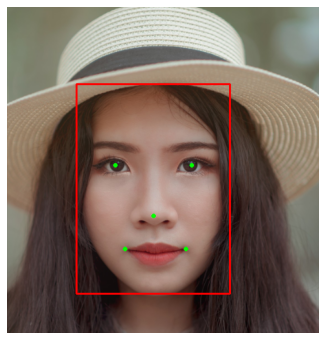

In [ ]:
import matplotlib.pyplot as plt

THRES_CONFIDENCE = 0.9
RED_COLOR = (255, 0, 0)
GREEN_COLOR = (0, 255, 0)

img_res= img.copy()

for det in detection_result:
    if det['confidence'] >= THRES_CONFIDENCE:
        x, y, width, height = det['box']
        keypoints = det['keypoints']

        # Draw the face location (red color):
        cv2.rectangle(img_res, (x,y), (x+width,y+height), RED_COLOR, 2)

        # Draw all keypoints (green color):
        for key, pos in keypoints.items():
          cv2.circle(img_res, pos, 2, GREEN_COLOR, 2)

plt.figure(figsize = (6,6))
plt.imshow(img_res)
plt.axis('off')

# FER: Facial expression recognition

[FER (Facial expression recognition)](https://pypi.org/project/fer/) requires OpenCV>=3.2 and Tensorflow>=1.7.0. The following example illustrates how to use this package:

```
from fer import FER
import cv2

img = cv2.imread("justin.jpg")
detector = FER()
detector.detect_emotions(img)
```
Output:

```
[{
  'box': [277, 90, 48, 63], 
  'emotions': 
    {'angry': 0.02, 
     'disgust': 0.0, 
     'fear': 0.05, 
     'happy': 0.16, 
     'neutral': 0.09, 
     'sad': 0.27, 
     'surprise': 0.41
}]
```

FER includes methods and package structure copied or derived from [Iván de Paz Centeno's implementation of MTCNN](https://github.com/ipazc/mtcnn/) and [Octavio Arriaga's facial expression recognition repo](https://github.com/oarriaga/face_classification/).

In [ ]:
# Install FER (tested version was '20.1.1'. Released date: Nov 10, 2020)
!pip install fer==20.1.1

In [ ]:
from fer import FER

emotion_detector = FER()
img = cv2.imread('face_img.png')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [ ]:
%%timeit
emotion_result = emotion_detector.detect_emotions(img)

1 loop, best of 3: 66.9 ms per loop


In [ ]:
%%time
emotion_result = emotion_detector.detect_emotions(img)

CPU times: user 129 ms, sys: 0 ns, total: 129 ms
Wall time: 77.1 ms


In [ ]:
print("Emotion result: '{}'".format(emotion_result))

Emotion result: '[{'box': (89, 150, 274, 274), 'emotions': {'angry': 0.01, 'disgust': 0.0, 'fear': 0.02, 'happy': 0.01, 'sad': 0.03, 'surprise': 0.0, 'neutral': 0.93}}]'


In [ ]:
# Get only the emotions dictionary:
emotions = emotion_result[0]['emotions']

# Get the (key,value) for the entry in the dictionary with max value:
top_emotion = max(emotions.items(), key = lambda k : k[1])

print("Top emotion: '{}'".format(top_emotion))

Top emotion: '('neutral', 0.93)'


In [ ]:
# The detector can be used also to detect the top emotion:
emotion_result = emotion_detector.top_emotion(img)
print("Emotion result: '{}'".format(emotion_result))

Emotion result: '('neutral', 0.93)'


Faces by default are detected using OpenCV's Haar Cascade classifier. To use the more accurate MTCNN network, add the parameter `mtcnn=True`:
```
detector = FER(mtcnn=True)
```

In [ ]:
emotion_detector = FER(mtcnn=True)
emotion_result = emotion_detector.detect_emotions(img)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


(-0.5, 481.5, 503.5, -0.5)

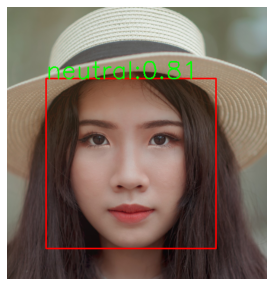

In [ ]:
import matplotlib.pyplot as plt

RED_COLOR = (255, 0, 0)
GREEN_COLOR = (0, 255, 0)

img_res= img.copy()

for res in emotion_result:
      x, y, width, height = res['box']

      # Get only the emotions dictionary:
      emotions = res['emotions']

      # Get the (key,value) for the entry in the dictionary with max value:
      top_emotion = max(emotions.items(), key = lambda k : k[1])
      
      str_emotion = str(top_emotion[0] + ":" + str(top_emotion[1]))

      # Draw the face location (red color):
      cv2.rectangle(img_res, (x,y), (x+width,y+height), RED_COLOR, 2)

      # Draw emotion:
      cv2.putText(img_res, str_emotion, (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1.5, GREEN_COLOR, 2)

plt.figure(figsize = (5,5))
plt.imshow(img_res)
plt.axis('off')

# Facial landmarks detection using OpenCV

First, download some necessary data to perform landmarks detection with OpenCV:

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml
!wget https://raw.githubusercontent.com/kurnianggoro/GSOC2017/master/data/lbfmodel.yaml
!wget https://github.com/opencv/opencv_3rdparty/blob/contrib_face_alignment_20170818/face_landmark_model.dat?raw=true -O face_landmark_model.dat
!wget https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/test_face_processing.jpg

First point is to detect the faces in the sample image. Initial tests indicate that `cv2.face.getFacesHAAR()` detects more faces than `detectMultiScale()` despite the fact that both methods use the same cascade file classifier ("`haarcascade_frontalface_alt2.xml`"). That is why, for this example, we are using `cv2.face.getFacesHAAR()`.

Note that you can explore more about face detection techniques in my repo, using: 1) [OpenCV haar cascade based methods](https://github.com/PacktPublishing/Mastering-OpenCV-4-with-Python/blob/master/Chapter11/01-chapter-content/face_detection/face_detection_opencv_haar.py) (the ones used in this notebook), 2) dlib face detection ([based on HOG](https://github.com/PacktPublishing/Mastering-OpenCV-4-with-Python/blob/master/Chapter11/01-chapter-content/face_detection/face_detection_dlib_hog.py) and [based on Deep Learning](https://github.com/PacktPublishing/Mastering-OpenCV-4-with-Python/blob/master/Chapter11/01-chapter-content/face_detection/face_detection_dlib_cnn.py)), 3) [OpenCV deep learning based methods](https://github.com/PacktPublishing/Mastering-OpenCV-4-with-Python/blob/master/Chapter11/01-chapter-content/face_detection/face_detection_opencv_dnn.py).


In [ ]:
import cv2

img = cv2.imread('/content/test_face_processing.jpg')

# cas = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
# faces = cas.detectMultiScale(img)

retval, faces = cv2.face.getFacesHAAR(img, "haarcascade_frontalface_alt2.xml")

print(faces)

[[[693 105 258 258]]

 [[103  64 298 298]]

 [[330 101 358 358]]]


In [ ]:
faces = np.squeeze(faces)
print(faces)

[[693 105 258 258]
 [103  64 298 298]
 [330 101 358 358]]


In [ ]:
import numpy as np

facemarkLBF = cv2.face.createFacemarkLBF()
facemarkLBF.loadModel("lbfmodel.yaml")
ok, landmarks_result_LBF = facemarkLBF.fit(img, faces)

# Just to see the shape. For one detected face
# For one detected face, landmarks shape is (1, 1, 68, 2)
# For two detected faces, landmarks shape is (2, 1, 68, 2)
print(np.array(landmarks_result_LBF).shape)

(3, 1, 68, 2)


In [ ]:
facemarkKazemi = cv2.face.createFacemarkKazemi()
facemarkKazemi.loadModel("face_landmark_model.dat")
ok, landmarks_result_Kazemi = facemarkKazemi.fit(img, faces)
print(np.array(landmarks_result_Kazemi).shape)

(3, 1, 68, 2)


(-0.5, 959.5, 699.5, -0.5)

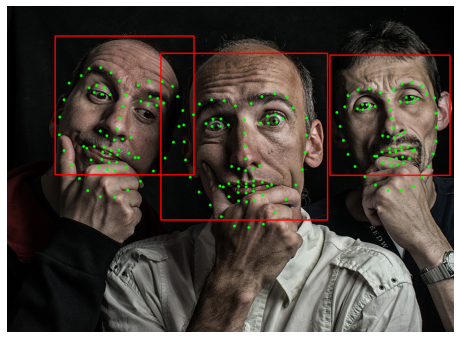

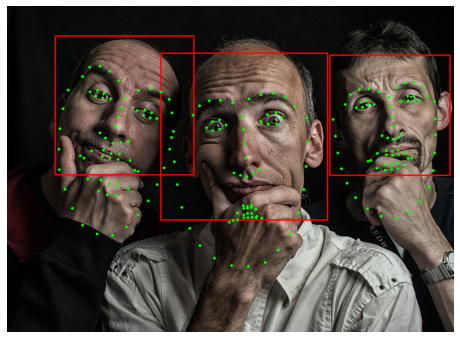

In [ ]:
import matplotlib.pyplot as plt

RED_COLOR = (255, 0, 0)
GREEN_COLOR = (0, 255, 0)

img_res_LBF = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)
img_res_Kazemi = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

# Draw the faces:
for (x, y, w, h) in faces:
  cv2.rectangle(img_res_LBF, (x, y), (x + w, y + h), RED_COLOR, 2)
  cv2.rectangle(img_res_Kazemi, (x, y), (x + w, y + h), RED_COLOR, 2)

# Draw the landmarks:
for landmarks in landmarks_result_LBF:
  cv2.face.drawFacemarks(img_res_LBF, landmarks, GREEN_COLOR)

for landmarks in landmarks_result_Kazemi:
  cv2.face.drawFacemarks(img_res_Kazemi, landmarks, GREEN_COLOR)

plt.figure(figsize = (8,8))
plt.imshow(img_res_LBF)
plt.axis('off')

plt.figure(figsize = (8,8))
plt.imshow(img_res_Kazemi)
plt.axis('off')

# Conclusions

In this notebook we have seen some packages to be used for face processing:
- MTCNN: Face and facial landmarks detection
- FER: Facial expression recognition
- Facial landmarks and face detection using OpenCV

Moreover, you can also explore other topics related to face processing:
- [Landmarks detection](https://github.com/PacktPublishing/Mastering-OpenCV-4-with-Python/tree/master/Chapter11/01-chapter-content/facial_landmarks) using both [dlib](https://pypi.org/project/dlib/) and [face_recognition](https://pypi.org/project/face-recognition/) libraries

- [Face tracking based on correlation filters](https://github.com/PacktPublishing/Mastering-OpenCV-4-with-Python/tree/master/Chapter11/01-chapter-content/face_tracking) using dlib

- [Face recognition examples](https://github.com/PacktPublishing/Mastering-OpenCV-4-with-Python/tree/master/Chapter11/01-chapter-content/face_recognition) using face_recognition library


